In [2]:
import os, warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf

def set_seed(seed = 31415):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ["PYTHONHASHSEED"] = str(seed)
  os.environ["TF_DETERMINISTIC_OPS"] = "1"
set_seed()


**1 - Importação e visualização do banco de dados**

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils


(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [4]:
for mod in [X_train, X_test]:
  mod = mod/255

Y_train_cat = keras.utils.to_categorical(Y_train)
Y_test_cat = keras.utils.to_categorical(Y_test)

In [5]:
def convert_image(img, y_label):
  y_labels_conv = pd.Series(y_label.flatten()).map(({0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog',
                                        6:'Frog',7:'Horse', 8:'Ship', 9:'Truck'}))
  
  plt.figure(figsize=(14,6))
  
  for x in range(21):
    plt.subplot(3,7, 1+x)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[x])
    plt.xlabel(y_labels_conv[x])
  plt.show()

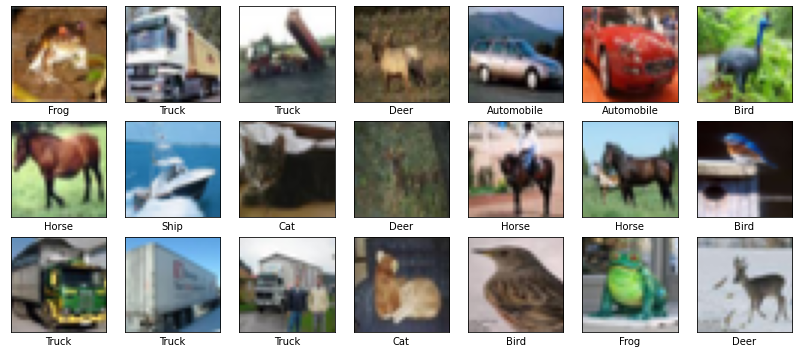

In [6]:
convert_image(X_train, Y_train)
 

**2 - Criação da Rede Neural Convolucional**

In [7]:
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def block_construction(input_layer, filter, kernel_size, activations='relu', paddings='SAME', drop_out=True, normalization=True, drop_out_rate=.3):
  img_conv2d = layers.Conv2D(filter,
                              kernel_size,
                              padding=paddings,
                              activation = activations
                              )(input_layer)

  img_max_pooling = layers.MaxPooling2D(pool_size=(2,2), padding=paddings)(img_conv2d)

  if drop_out == True:
    img_conv2d = layers.Dropout(rate=drop_out_rate)(img_max_pooling)
 
  if normalization == True:
    img_conv2d = layers.BatchNormalization()(img_max_pooling)
  
  return img_conv2d

In [8]:
def img_contruc(input_layer, neurons, classification='relu', out_activation='softmax', num_class=10):
  img_flatten = layers.Flatten()(input_layer)
  img_classifier = layers.Dense(neurons, classification)(img_flatten)
  img_soft = layers.Dense(num_class, out_activation)(img_classifier)

  return img_soft

In [9]:
data_input = layers.Input(shape=(32,32,3))

img_c = block_construction(data_input, 32, 3)

img_c_2 = block_construction(img_c, 64, 3)

img_c_3 = block_construction(img_c_2, 128, 3)

out_img = img_contruc(img_c_3, 128)

model = keras.Model(data_input, out_img)

early_stopping = keras.callbacks.EarlyStopping(min_delta=0, patience=10, restore_best_weights=True)

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['Accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0     

In [10]:
data_input2 = layers.Input(shape=(32,32,3))

img_c2 = block_construction(data_input2, 32, 3)

img_c_22 = block_construction(img_c2, 64, 3)

img_c_32 = block_construction(img_c_22, 128, 3)

out_img2 = img_contruc(img_c_32, 128)

model2 = keras.Model(data_input2, out_img2)

early_stopping2 = keras.callbacks.EarlyStopping(min_delta=0, patience=10, restore_best_weights=True)

model2.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['Accuracy'])

model2.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0   

**3 - Treinamento e Avaliação da CNN**

In [11]:
fit_train = model.fit(X_train, Y_train_cat, batch_size= 128, epochs = 50, callbacks = early_stopping, validation_data=(X_test,Y_test_cat))

Epoch 1/50
391/391 [==============================] - 19s 10ms/step - loss: 0.2011 - Accuracy: 0.5667 - val_loss: 0.1861 - val_Accuracy: 0.6020
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 0.1371 - Accuracy: 0.7206 - val_loss: 0.1427 - val_Accuracy: 0.7049
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.1107 - Accuracy: 0.7843 - val_loss: 0.1503 - val_Accuracy: 0.7029
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 0.0908 - Accuracy: 0.8304 - val_loss: 0.1576 - val_Accuracy: 0.6917
Epoch 5/50
391/391 [==============================] - 3s 9ms/step - loss: 0.0731 - Accuracy: 0.8702 - val_loss: 0.1303 - val_Accuracy: 0.7549
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 0.0573 - Accuracy: 0.9074 - val_loss: 0.1502 - val_Accuracy: 0.7406
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0440 - Accuracy: 0.9345 - val_loss: 0.1698 - val_Accuracy: 0.7197
Epoc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

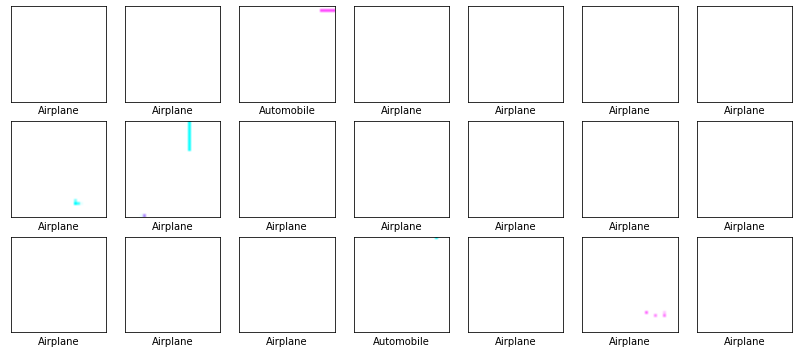

In [12]:
img_rot = ImageDataGenerator(horizontal_flip=True, width_shift_range=.3, height_shift_range=.3)

img_rot.fit(X_train)

train_img_rot = img_rot.flow(X_train,Y_train_cat, batch_size=128)

img_next, label_next = next(train_img_rot)

convert_image(img_next,label_next)

In [13]:
img_rot_fit = model2.fit(train_img_rot, steps_per_epoch= X_train.shape[0]//128, epochs=50, callbacks=early_stopping, validation_data=(X_test,Y_test_cat))

Epoch 1/50
390/390 [==============================] - 24s 60ms/step - loss: 0.2489 - Accuracy: 0.4229 - val_loss: 0.2289 - val_Accuracy: 0.4920
Epoch 2/50
390/390 [==============================] - 24s 61ms/step - loss: 0.2074 - Accuracy: 0.5347 - val_loss: 0.1920 - val_Accuracy: 0.5811
Epoch 3/50
390/390 [==============================] - 24s 62ms/step - loss: 0.1865 - Accuracy: 0.5907 - val_loss: 0.2039 - val_Accuracy: 0.5641
Epoch 4/50
390/390 [==============================] - 24s 62ms/step - loss: 0.1726 - Accuracy: 0.6293 - val_loss: 0.1745 - val_Accuracy: 0.6358
Epoch 5/50
390/390 [==============================] - 23s 60ms/step - loss: 0.1599 - Accuracy: 0.6625 - val_loss: 0.1549 - val_Accuracy: 0.6773
Epoch 6/50
390/390 [==============================] - 24s 61ms/step - loss: 0.1510 - Accuracy: 0.6823 - val_loss: 0.1494 - val_Accuracy: 0.6884
Epoch 7/50
390/390 [==============================] - 25s 64ms/step - loss: 0.1439 - Accuracy: 0.6992 - val_loss: 0.1613 - val_Accuracy:

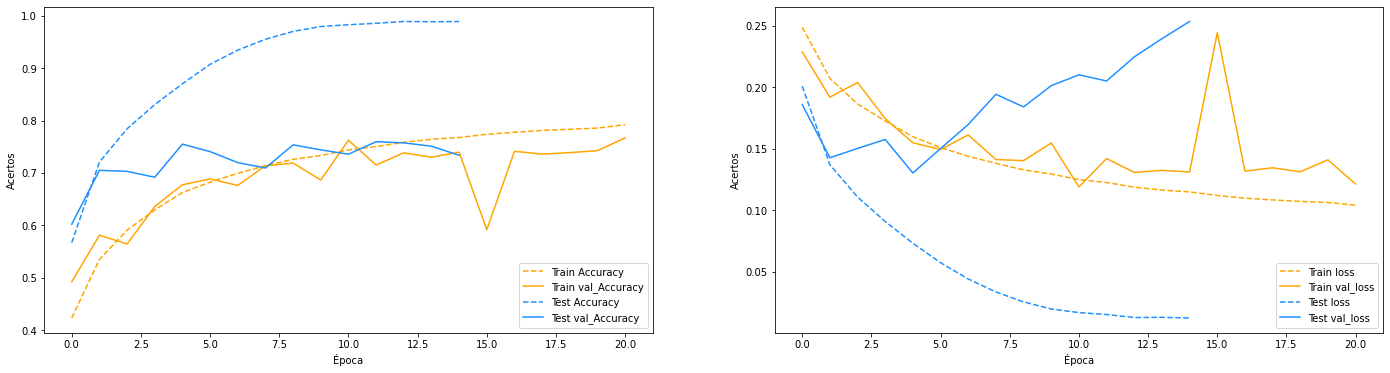

In [102]:
fig, pl = plt.subplots(1,2,figsize=(24,6))

def plotimage(bd1, bd2, label1, label2, dimm):
  pl[dimm].plot(bd1.history[label1], label='Train ' + label1, color='orange', ls='--')
  pl[dimm].plot(bd1.history[label2], label='Train ' + label2, color='orange')

  pl[dimm].plot(bd2.history[label1], label='Test ' + label1, color='dodgerblue', ls='--')
  pl[dimm].plot(bd2.history[label2], label='Test '+ label2, color='dodgerblue')

  pl[dimm].set_xlabel('Época')
  pl[dimm].set_ylabel('Acertos')
  pl[dimm].legend(loc='lower right')

plotimage(img_rot_fit, fit_train, 'Accuracy', 'val_Accuracy', 0)

plotimage(img_rot_fit, fit_train, 'loss', 'val_loss', 1)

In [103]:
result_fit_train = model.evaluate(X_test, Y_test_cat)

result_img_rot_fit = model2.evaluate(X_test,Y_test_cat)

print('Valor do modelo sem aumento de dados: %s \nValor do modelo com aumento de dados: %s' %(str(result_fit_train), str(result_img_rot_fit)))


313/313 [==============================] - 1s 3ms/step - loss: 0.1190 - Accuracy: 0.7625
Valor do modelo sem aumento de dados: [0.13026951253414154, 0.7548999786376953] 
Valor do modelo com aumento de dados: [0.11897073686122894, 0.762499988079071]
